# N-pendulum

Solving the n-pendulum problem using Lagrangian mechanincs.

## Tools:
- Lagrangian mechanics
- Sympy: to do the symbolic calculations
- Scipy: to solve the differential equations
- Matplotlib: to plot the results

## Theory

N masses, $(m_1, m_2, \ldots, m_N)$, are connected by rigid massless rods of length $(l_i)$, and are free to swing in a plane. The angles of the rods with the vertical are $(\theta_i)$.

### Coordinates transformations
Position of the masses:

$$
\begin{align}
r_1(t) &= (l_1 \sin(\theta_1(t)), -l_1 \cos(\theta_1(t))) \\
r_i(t) &= r_{i-1}(t) + (l_i \sin(\theta_i(t)), -l_i \cos(\theta_i(t)))
\end{align}
$$

The speed of the masses is given by:

$$
\begin{align}
v_1(t) &= \dot{r_1}(t) = (l_1 \dot{\theta_1} \cos(\theta_1(t)), l_1 \dot{\theta_1} \sin(\theta_1(t))) \\
v_i(t) &= \dot{r_i}(t) = v_{i-1}(t) + (l_i \dot{\theta_i} \cos(\theta_i(t)), l_i \dot{\theta_i} \sin(\theta_i(t)))
\end{align}
$$

### Kinetic and potential energy

The kinetic energy of the system is:
- $T_i = \frac{1}{2} m_i (\vec{v_i}\cdot\vec{v_i})$
- $T = \sum_i T_i$

The potential energy of the system is:
- $V_i = m_i g (\vec{r_i} \cdot \hat{y})$
- $V = \sum_i V_i$

### Lagrangian

The Lagrangian is defined as $L = T - V$.

For multiple pendulums:
- $L = \sum_i T_i - V_i$

### Equations of motion

The equations of motion are given by the Euler-Lagrange equations:
- $\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q_i}} \right) - \frac{\partial L}{\partial q_i} = 0$

We have $N$ 2nd order differential equations, we can convert them to $2N$ ODEs:

$$
\begin{align}
\dot{\theta_i} &= \omega_i \\
\dot{\omega_i} &= \ddot{\theta_i} = \ldots
\end{align}
$$

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from sympy import symbols, Eq, solve
from scipy.integrate import odeint
from matplotlib import animation

In [31]:
# Define params as symbols
t, g = smp.symbols('t g')
m1, m2, m3, m4 = smp.symbols('m1 m2 m3 m4')
l1, l2, l3, l4= smp.symbols('l1 l2 l3 l4')

# Define generalized coordinates
th1, th2 = smp.symbols('theta_1 theta_2', cls=smp.Function)
th3, th4 = smp.symbols('theta_3 theta_4', cls=smp.Function)

th1, th2 = th1(t), th2(t)
th3, th4 = th3(t), th4(t)

# Define the derivatives and second derivatives
th1_d = smp.diff(th1, t)
th2_d = smp.diff(th2, t)
th3_d = smp.diff(th3, t)
th4_d = smp.diff(th4, t)

th1_dd = smp.diff(th1_d, t)
th2_dd = smp.diff(th2_d, t)
th3_dd = smp.diff(th3_d, t)
th4_dd = smp.diff(th4_d, t)

# Define the positions
r1 = smp.Matrix([l1*smp.sin(th1), -l1*smp.cos(th1)])
r2 = r1 + smp.Matrix([l2*smp.sin(th2), -l2*smp.cos(th2)])
r3 = r2 + smp.Matrix([l3*smp.sin(th3), -l3*smp.cos(th3)])
r4 = r3 + smp.Matrix([l4*smp.sin(th4), -l4*smp.cos(th4)])

# Define the velocities
v1 = r1.diff(t)
v2 = r2.diff(t)
v3 = r3.diff(t)
v4 = r4.diff(t)

In [32]:
# Kinetic energy
T1 = 0.5*m1*v1.dot(v1)
T2 = 0.5*m2*v2.dot(v2)
T3 = 0.5*m3*v3.dot(v3)
T4 = 0.5*m4*v4.dot(v4)

T = (T1 + T2 + T3 + T4).simplify()

# Potential energy
V1 = m1*g*r1[1]
V2 = m2*g*r2[1]
V3 = m3*g*r3[1]
V4 = m4*g*r4[1]

V = (V1 + V2 + V3 + V4).simplify()

# Lagrangian
L = (T - V).simplify()

In [34]:
L

g*(l1*m1*cos(theta_1(t)) + l1*m2*cos(theta_1(t)) + l1*m3*cos(theta_1(t)) + l1*m4*cos(theta_1(t)) + l2*m2*cos(theta_2(t)) + l2*m3*cos(theta_2(t)) + l2*m4*cos(theta_2(t)) + l3*m3*cos(theta_3(t)) + l3*m4*cos(theta_3(t)) + l4*m4*cos(theta_4(t))) + 0.5*l1**2*m1*Derivative(theta_1(t), t)**2 + 0.5*m2*(l1**2*Derivative(theta_1(t), t)**2 + 2*l1*l2*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)*Derivative(theta_2(t), t) + l2**2*Derivative(theta_2(t), t)**2) + 0.5*m3*(l1**2*Derivative(theta_1(t), t)**2 + 2*l1*l2*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)*Derivative(theta_2(t), t) + 2*l1*l3*cos(theta_1(t) - theta_3(t))*Derivative(theta_1(t), t)*Derivative(theta_3(t), t) + l2**2*Derivative(theta_2(t), t)**2 + 2*l2*l3*cos(theta_2(t) - theta_3(t))*Derivative(theta_2(t), t)*Derivative(theta_3(t), t) + l3**2*Derivative(theta_3(t), t)**2) + 0.5*m4*(l1**2*Derivative(theta_1(t), t)**2 + 2*l1*l2*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)*Derivative(theta_2(t), t) + 2*l1*l3*c

To ease a bit the computation, we can simplify the equations considering the case:
- $m_i = m$
- $l_i = l$

In [37]:
m, l = symbols('m l')
repalce_dict = {m1: m, m2: m, m3: m, m4: m, l1: l, l2: l, l3: l, l4: l}
L = L.subs(repalce_dict).simplify()

In [38]:
L

l*m*(4.0*g*cos(theta_1(t)) + 3.0*g*cos(theta_2(t)) + 2.0*g*cos(theta_3(t)) + 1.0*g*cos(theta_4(t)) + 3.0*l*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)*Derivative(theta_2(t), t) + 2.0*l*cos(theta_1(t) - theta_3(t))*Derivative(theta_1(t), t)*Derivative(theta_3(t), t) + 1.0*l*cos(theta_1(t) - theta_4(t))*Derivative(theta_1(t), t)*Derivative(theta_4(t), t) + 2.0*l*cos(theta_2(t) - theta_3(t))*Derivative(theta_2(t), t)*Derivative(theta_3(t), t) + 1.0*l*cos(theta_2(t) - theta_4(t))*Derivative(theta_2(t), t)*Derivative(theta_4(t), t) + 1.0*l*cos(theta_3(t) - theta_4(t))*Derivative(theta_3(t), t)*Derivative(theta_4(t), t) + 2.0*l*Derivative(theta_1(t), t)**2 + 1.5*l*Derivative(theta_2(t), t)**2 + 1.0*l*Derivative(theta_3(t), t)**2 + 0.5*l*Derivative(theta_4(t), t)**2)

Lagrange equations:

$$
\begin{align*}
	\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}_1} \right) - \frac{\partial L}{\partial \theta_1} = 0 \\
	\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}_2} \right) - \frac{\partial L}{\partial \theta_2} = 0 \\
	\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}_3} \right) - \frac{\partial L}{\partial \theta_3} = 0 \\
	\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}_4} \right) - \frac{\partial L}{\partial \theta_4} = 0 
\end{align*}
$$

In [39]:
LE1 = smp.diff(smp.diff(L, th1_d), t) - smp.diff(L, th1).simplify()
LE2 = smp.diff(smp.diff(L, th2_d), t) - smp.diff(L, th2).simplify()
LE3 = smp.diff(smp.diff(L, th3_d), t) - smp.diff(L, th3).simplify()
LE4 = smp.diff(smp.diff(L, th4_d), t) - smp.diff(L, th4).simplify()

In [40]:
solutions = smp.solve([LE1, LE2, LE3, LE4],
					  [th1_dd, th2_dd, th3_dd, th4_dd])

I have something like this:

- $\frac{d^2\theta_i}{dt^2} = \ldots$

This is a system of second order differential equations, to use scipy to solve this system, we need to convert it to a system of first order differential equations.

For a 2nd order differential equation this is always possible using a variable substitution. Let's define:

- $\omega_i = \frac{d\theta_i}{dt}$


Then we have:

- $\frac{d^2\theta_i}{dt^2} = \frac{d\omega_i}{dt}$


The system of first order differential equations is:
$$
\begin{align*}
	\frac{d\theta_i}{dt} &= \omega_i \\
	\frac{d\omega_i}{dt} &= \ldots
\end{align*}
$$

Converting this symbolic equations to numerical functions using lambdify, we can use scipy to solve the system of differential equations.

In [41]:
dw1_dt_func = smp.lambdify((th1, th2, th3, th4,
							th1_d, th2_d, th3_d, th4_d,
							m, l, g), solutions[th1_dd])

dw2_dt_func = smp.lambdify((th1, th2, th3, th4,
							th1_d, th2_d, th3_d, th4_d,
							m, l, g), solutions[th2_dd])

dw3_dt_func = smp.lambdify((th1, th2, th3, th4,
							th1_d, th2_d, th3_d, th4_d,
							m, l, g), solutions[th3_dd])

dw4_dt_func = smp.lambdify((th1, th2, th3, th4,
							th1_d, th2_d, th3_d, th4_d,
							m, l, g), solutions[th4_dd])

dth1_dt_func = smp.lambdify(th1_d, th1_d)
dth2_dt_func = smp.lambdify(th2_d, th2_d)
dth3_dt_func = smp.lambdify(th3_d, th3_d)
dth4_dt_func = smp.lambdify(th4_d, th4_d)

Define the state vector:
- $ \vec{S} = [\theta_1, \theta_2, \theta_3, \theta_4, \omega_1, \omega_2, \omega_3, \omega_4] $

and the function $f(\vec{S}, t)$ that returns the derivative of the state vector.

In [42]:
def dSdt(S, t, m, l, g):
	th1, th2, th3, th4, w1, w2, w3, w4 = S
	dw1_dt = dw1_dt_func(th1, th2, th3, th4, w1, w2, w3, w4, m, l, g)
	dw2_dt = dw2_dt_func(th1, th2, th3, th4, w1, w2, w3, w4, m, l, g)
	dw3_dt = dw3_dt_func(th1, th2, th3, th4, w1, w2, w3, w4, m, l, g)
	dw4_dt = dw4_dt_func(th1, th2, th3, th4, w1, w2, w3, w4, m, l, g)
	return [dth1_dt_func(w1),
			dth2_dt_func(w2),
			dth3_dt_func(w3),
			dth4_dt_func(w4),
			dw1_dt,
			dw2_dt,
			dw3_dt,
			dw4_dt, 
		]

In [43]:
# Define the params
m = 1
l = 1
g = 9.81

# Time span
t = np.linspace(0, 40, 1001)

# Initial conditions
S0 = [np.pi/6, np.pi/5, np.pi/4, np.pi/3,
	  1, 2, -1, -2]

In [44]:
sol = odeint(dSdt, S0, t, args=(m, l, g))

In [45]:
sol.T.shape

(8, 1001)

In [47]:
th1 = sol.T[0]
th2 = sol.T[1]
th3 = sol.T[2]
th4 = sol.T[3]
thetas = np.array([th1, th2, th3, th4])

In [48]:
def plot_angle_time(t, thetas):
	plt.figure(figsize=(10, 5))
	for i, theta in enumerate(thetas):
		plt.plot(t, theta, label=f'$\\theta_{i+1}$')

	plt.xlabel('Time [s]')
	plt.ylabel('Angle [rad]')
	plt.legend()
	plt.grid()
	plt.show()

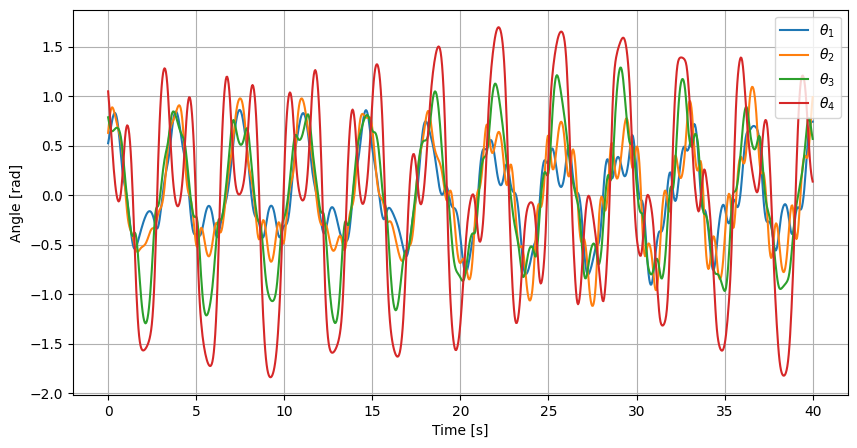

In [49]:
plot_angle_time(t, thetas)

In [51]:
# Define the position of the masses from the angles

def get_positions(t, l, thetas):
	xs = []
	ys = []
	for theta in thetas:
		x_prev = xs[-1] if xs else 0
		y_prev = ys[-1] if ys else 0

		x = x_prev + l*np.sin(theta)
		y = y_prev - l*np.cos(theta)

		xs.append(x)
		ys.append(y)

	return xs, ys

xs, ys = get_positions(t, l, thetas)
x1, x2, x3, x4 = xs
y1, y2, y3, y4 = ys

In [53]:
from matplotlib.animation import FuncAnimation

def do_animation():
	def init():
		ln1.set_data([], [])
		return ln1,

	def animate(i):
		ln1.set_data([0, x1[i], x2[i], x3[i], x4[i]],
			   [0, y1[i], y2[i], y3[i], y4[i]])
		return ln1,

	fig, ax = plt.subplots(1,1, figsize=(8,8))
	ax.set_facecolor('white')
	ln1, = plt.plot([], [], 'kx--', lw=3, markersize=8)
	ax.set_ylim(-(4*l+1), 4*l+1)
	ax.set_xlim(-(4*l+1), 4*l+1)

	ani = FuncAnimation(fig, animate, frames=1000, interval=50, blit=True, init_func=init)

	return ani

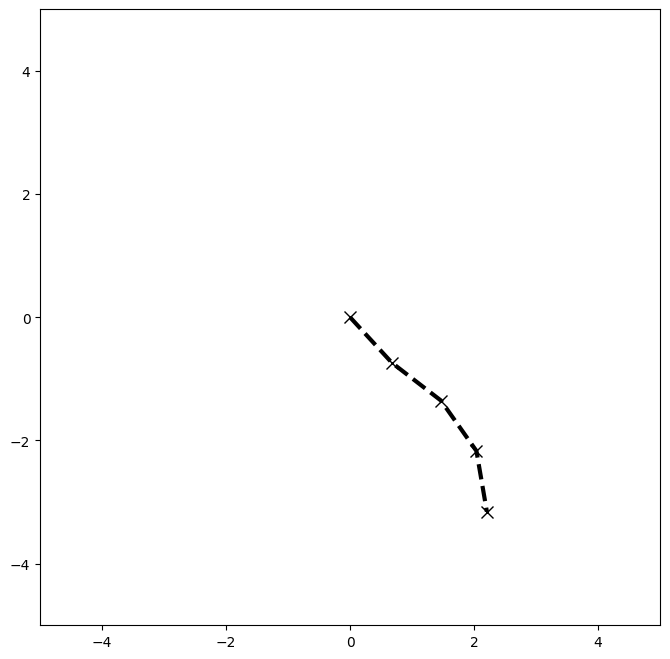

In [54]:
ani = do_animation()
ani.save('4_pendulum.gif', writer='pillow', fps=25)